In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense, Flatten
import matplotlib.pyplot as plt

In [3]:
# Load your dataset
data = pd.read_csv('Data1_Columbia.csv')  # Replace 'your_dataset.csv' with your actual dataset file name


In [4]:
# Preprocessing
# Assuming your dataset has a target variable 'target_column'
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Rainfall']])
window_size = 10  # Adjust this value based on your desired time window

In [5]:
# Create the input features and target variable
X = []
y = []
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i, 0])
X = np.array(X)
y = np.array(y)


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
# Reshape the input data for the CNN-LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
# Build the CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dense(units=1))

In [9]:
# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/10
771/771 [==============================] - 10s 8ms/step - loss: 0.0112 - val_loss: 0.0010
Epoch 2/10
771/771 [==============================] - 5s 6ms/step - loss: 5.6941e-05 - val_loss: 0.0010
Epoch 3/10
771/771 [==============================] - 5s 6ms/step - loss: 5.8473e-05 - val_loss: 9.9880e-04
Epoch 4/10
771/771 [==============================] - 5s 6ms/step - loss: 5.8384e-05 - val_loss: 9.8977e-04
Epoch 5/10
771/771 [==============================] - 5s 6ms/step - loss: 5.9111e-05 - val_loss: 9.7809e-04
Epoch 6/10
771/771 [==============================] - 5s 6ms/step - loss: 6.3349e-05 - val_loss: 9.5946e-04
Epoch 7/10
771/771 [==============================] - 5s 6ms/step - loss: 5.6270e-05 - val_loss: 9.4646e-04
Epoch 8/10
771/771 [==============================] - 5s 6ms/step - loss: 5.8212e-05 - val_loss: 9.3283e-04
Epoch 9/10
771/771 [==============================] - 5s 6ms/step - loss: 5.4840e-05 - val_loss: 9.1816e-04
Epoch 10/10
771/771 [==================

In [10]:
# Make predictions on the test set
predictions = model.predict(X_test)

97/97 [==============================] - 1s 3ms/step


In [11]:
# Reverse scaling for predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
# Calculate the prediction accuracy in percentage
threshold = 5  # Define the threshold for correctness
diff = np.abs(predictions - y_test)
accuracy = (diff <= threshold).mean() * 100

print('Prediction Accuracy:', accuracy, '%')

Prediction Accuracy: 75.29565023681076 %


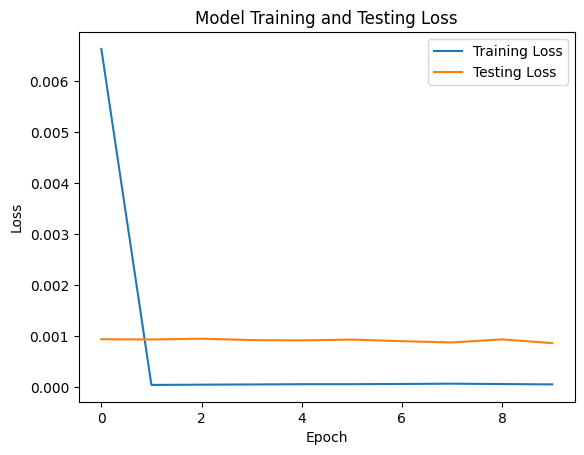

In [ ]:
# Plot training and testing loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Model Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()